# EXPLORATORY DATA ANALYSIS   
Notebook containing my exploratory data analysis for the UCI Activities of Daily Living (ADL) data set.  Due to the number of plots generated, most will be output to file and compiled in a slide pack that will accompany this notebook.

In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [28]:
# Load in the csv saved from the File Extraction notebook that contains the accelerometer files for each activity
dataset = pd.read_csv("../Data/MasterFileDF.csv")

In [29]:
dataset.head()

,standup_chair,sitdown_chair,comb_hair,walk,descend_stairs,drink_glass,eat_meat,eat_soup,pour_water,liedown_bed,getup_bed,use_telephone,brush_teeth
0,Accelerometer-2011-03-23-10-39-18-standup_chai...,Accelerometer-2011-03-24-09-50-16-sitdown_chai...,Accelerometer-2011-03-24-09-44-34-comb_hair-f1...,Accelerometer-2011-03-24-09-51-07-walk-f1.txt,Accelerometer-2011-03-24-10-24-02-descend_stai...,Accelerometer-2011-03-24-10-07-02-drink_glass-...,Accelerometer-2011-03-24-13-06-15-eat_meat-f1.txt,Accelerometer-2011-03-24-13-33-22-eat_soup-f1.txt,Accelerometer-2011-03-24-10-04-32-pour_water-f...,Accelerometer-2011-03-29-09-19-22-liedown_bed-...,Accelerometer-2011-03-29-09-21-17-getup_bed-f1...,Accelerometer-2011-03-29-09-30-56-use_telephon...,Accelerometer-2011-04-11-13-28-18-brush_teeth-...
1,Accelerometer-2011-03-23-10-42-01-standup_chai...,Accelerometer-2011-03-24-10-27-33-sitdown_chai...,Accelerometer-2011-03-24-10-26-33-comb_hair-f1...,Accelerometer-2011-03-24-09-52-11-walk-f1.txt,Accelerometer-2011-03-24-10-25-11-descend_stai...,Accelerometer-2011-03-24-10-16-02-drink_glass-...,Accelerometer-2011-03-24-13-10-14-eat_meat-f1.txt,Accelerometer-2011-03-24-13-44-18-eat_soup-f1.txt,Accelerometer-2011-03-24-10-51-12-pour_water-f...,Accelerometer-2011-03-29-09-23-22-liedown_bed-...,Accelerometer-2011-03-29-09-24-50-getup_bed-f1...,Accelerometer-2011-03-29-09-32-59-use_telephon...,Accelerometer-2011-04-11-13-29-54-brush_teeth-...
2,Accelerometer-2011-03-23-10-45-51-standup_chai...,Accelerometer-2011-03-24-16-09-29-sitdown_chai...,Accelerometer-2011-03-24-10-57-40-comb_hair-f1...,Accelerometer-2011-03-24-10-58-34-walk-f1.txt,Accelerometer-2011-03-24-11-20-43-descend_stai...,Accelerometer-2011-03-24-10-46-25-drink_glass-...,Accelerometer-2011-03-24-13-12-52-eat_meat-f1.txt,Accelerometer-2011-03-24-13-56-42-eat_soup-f1.txt,Accelerometer-2011-03-24-13-30-01-pour_water-f...,Accelerometer-2011-03-29-09-45-46-liedown_bed-...,Accelerometer-2011-03-29-09-49-03-getup_bed-f1...,Accelerometer-2011-03-29-09-52-41-use_telephon...,Accelerometer-2011-05-30-08-35-11-brush_teeth-...
3,Accelerometer-2011-03-23-10-47-59-standup_chai...,Accelerometer-2011-03-29-09-06-48-sitdown_chai...,Accelerometer-2011-03-24-16-10-36-comb_hair-f2...,Accelerometer-2011-03-24-11-20-24-walk-f1.txt,Accelerometer-2011-03-29-09-15-58-descend_stai...,Accelerometer-2011-03-24-11-14-00-drink_glass-...,Accelerometer-2011-03-24-13-17-42-eat_meat-f1.txt,NaN,Accelerometer-2011-04-05-18-54-14-pour_water-f...,Accelerometer-2011-04-05-18-27-12-liedown_bed-...,Accelerometer-2011-04-05-18-28-21-getup_bed-f1...,Accelerometer-2011-04-05-18-29-19-use_telephon...,Accelerometer-2011-05-30-09-36-50-brush_teeth-...
4,Accelerometer-2011-03-24-09-49-36-standup_chai...,Accelerometer-2011-03-29-09-12-27-sitdown_chai...,Accelerometer-2011-03-29-08-57-24-comb_hair-f1...,Accelerometer-2011-03-24-11-21-13-walk-f1.txt,Accelerometer-2011-03-29-16-16-34-descend_stai...,Accelerometer-2011-03-24-13-09-29-drink_glass-...,Accelerometer-2011-03-24-13-21-39-eat_meat-f1.txt,NaN,Accelerometer-2011-04-11-12-55-26-pour_water-f...,Accelerometer-2011-04-11-11-52-20-liedown_bed-...,Accelerometer-2011-04-11-11-53-01-getup_bed-f1...,Accelerometer-2011-04-11-11-53-34-use_telephon...,Accelerometer-2011-05-30-10-34-16-brush_teeth-...


In [55]:
# Inspect how many data sets we have for each activity
print dataset.count()
print "\nSum:   \t\t" + str(dataset.count().sum())

standup_chair     102
sitdown_chair     100
comb_hair          31
walk              100
descend_stairs     42
drink_glass       100
eat_meat            5
eat_soup            3
pour_water        100
liedown_bed        28
getup_bed         101
use_telephone      13
brush_teeth        12
dtype: int64

Sum:   		737


Based upon the number of datasets for 'eat_meat' and 'eat_soup', there would be insufficient samples to create a training and test set and therefore should be removed.  We could use these later in the model validation to see whether the model identifies them as an unknown activity. For the remainder of the exploratory data analysis, we'll keep all activities.

## Data Manipulation
Process the individual files in organise them for easy use during the feature engineering and model building phases

In [56]:
# Define a function that ingests the UCI txt file, and converts each x,y,z stream to 'g' based upon the process
# contained in MANUAL.txt
""""
Acceleration data recorded in the dataset are coded according to the following mapping:
	[0; +63] = [-1.5g; +1.5g]
The conversion rule to extract the real acceleration value from the coded value is the following:
	real_val = -1.5g + (coded_val/63)*3g
"""""
def convertAccel(filepath):
    # open the file
    df = pd.read_csv(filepath,sep=' ',names = ['x','y','z'],header=None)
    # convert each value using equation
    df = df.applymap(lambda x: -1.5 + (x/63.0)*3)
    # output the file as filename-converted.txt
    return df
    

In [57]:
# function to creates a list of tuples with format (filename,[accelerometer data],activity)

def createTuple(filename):
    filepath = '../Raw_Data/' + str(filename)  # create full file path to location of file in Data folder
    df = convertAccel(filepath)  # return a 3 column dataframe of the converted x,y,z accelerations
    activity = str(filename).split("-")[7]  # extract the activity name from the filename string
    output = (filename,(df.x,df.y,df.z),activity)
    return output
    

In [58]:
# function that loops through a dataframe of filenames and returns a list of tuples, one tuple for each filename
def createDataList(fileDataframe):
    dataList = []  # initialise a new empty list to fill with tuples
    for ADL in fileDataframe.columns:  # loop through each activity column
        for x in range(0,fileDataframe[ADL].count()): # loop through each filename that is a string (stops at NaN)
            summary = createTuple(fileDataframe[ADL][x])  # create the filename summary tuple
            dataList.append(summary)
    return dataList

In [59]:
# create a list of tuples, where each tuple is an activity file and the accelerometer data has been converted to g's
dataList = createDataList(dataset)

In [60]:
# Output an example of one of the tuples
dataList[1]

('Accelerometer-2011-03-23-10-42-01-standup_chair-f1.txt', (0      0.071429
  1      0.023810
  2      0.071429
  3      0.023810
  4      0.023810
  5      0.023810
  6      0.071429
  7      0.023810
  8      0.071429
  9      0.023810
  10     0.023810
  11     0.023810
  12     0.023810
  13     0.071429
  14     0.023810
  15     0.071429
  16     0.023810
  17     0.071429
  18     0.071429
  19     0.023810
  20     0.071429
  21     0.071429
  22     0.071429
  23     0.071429
  24     0.071429
  25     0.071429
  26     0.023810
  27     0.071429
  28    -0.023810
  29     0.023810
           ...   
  212   -0.928571
  213   -0.928571
  214   -0.976190
  215   -0.880952
  216   -1.023810
  217   -0.976190
  218   -0.976190
  219   -0.928571
  220   -0.928571
  221   -0.928571
  222   -0.928571
  223   -0.880952
  224   -0.880952
  225   -0.880952
  226   -0.976190
  227   -0.976190
  228   -0.928571
  229   -0.928571
  230   -0.928571
  231   -0.976190
  232   -0.976190
  233 

The accelerometer data is taken from a sensor unit mounted on the right hand of the subject with the x,y,z axes as shown in the image below

![](../image.jpg)

## Feature Generation

In [61]:
# function to calculate the root mean square
def rms(x):   
    return np.sqrt(x.dot(x)/x.size) 

In [62]:
# function to create all the model features; loop through each tuple in list
def createFeatures(activityTuple):
    
    features = pd.DataFrame(index = range(0,len(activityTuple)),columns = ['x_max','y_max','z_max','tot_max', \
                                                                           'x_min','y_min','z_min','tot_min',\
                                                                           'x_mean','y_mean','z_mean','tot_mean',\
                                                                           'x_rms','y_rms','z_rms','tot_rms','totTime'\
                                                                           ,'activity'])
    for row in range(0,len(activityTuple)):
        x,y,z = activityTuple[row][1]
        activity = activityTuple[row][2]
        totAccel = (x**2 + y**2 + z**2)**0.5
        features['x_max'][row] = float(np.max(x))
        features['y_max'][row] = np.max(y)
        features['z_max'][row] = np.max(z)
        features['tot_max'][row] = np.max(totAccel)
        features['x_min'][row] = np.min(x)
        features['y_min'][row] = np.min(y)
        features['z_min'][row] = np.min(z)
        features['tot_min'][row] = np.min(totAccel)
        features['x_mean'][row] = np.mean(x)
        features['y_mean'][row] = np.mean(y)
        features['z_mean'][row] = np.mean(z)
        features['tot_mean'][row] = np.mean(totAccel)
        features['x_rms'][row] = rms(x)
        features['y_rms'][row] = rms(y)
        features['z_rms'][row] = rms(z)
        features['tot_rms'][row] = rms(totAccel)
        features['totTime'][row] = len(x)*(1/32.0)  # The activity length in seconds is no. samples * 1/sampling rate
        features['activity'][row] = str(activity)
        
    return features

In [63]:
# Generate a dataframe of features
featuresDF = createFeatures(dataList)

In [64]:
featuresDF.head()

,x_max,y_max,z_max,tot_max,x_min,y_min,z_min,tot_min,x_mean,y_mean,z_mean,tot_mean,x_rms,y_rms,z_rms,tot_rms,totTime,activity
0,0.0238095,0.690476,1.02381,1.12561,-0.97619,0.166667,0.166667,0.817537,-0.698129,0.343254,0.44898,0.995518,0.767131,0.353572,0.529754,0.997067,5.25,standup_chair
1,0.0714286,0.452381,1.2619,1.34075,-1.11905,-0.119048,0.0238095,0.765986,-0.639118,0.250295,0.451397,0.998067,0.761834,0.26169,0.592319,0.999857,7.5625,standup_chair
2,0.214286,0.452381,1.11905,1.20161,-1.02381,-0.0714286,0.166667,0.828558,-0.580683,0.156383,0.525471,0.991714,0.743748,0.224283,0.618927,0.993245,9.40625,standup_chair
3,0.166667,0.547619,1.07143,1.19783,-1.16667,-0.214286,0.0238095,0.713889,-0.626582,0.246986,0.439873,0.994375,0.762173,0.272881,0.579552,0.995617,9.875,standup_chair
4,-0.0238095,0.261905,1.07143,1.17103,-1.11905,-0.404762,-0.357143,0.691297,-0.739796,0.117914,0.35856,0.989655,0.808055,0.182884,0.54641,0.992453,5.25,standup_chair


In [65]:
featuresDF.dtypes

x_max       object
y_max       object
z_max       object
tot_max     object
x_min       object
y_min       object
z_min       object
tot_min     object
x_mean      object
y_mean      object
z_mean      object
tot_mean    object
x_rms       object
y_rms       object
z_rms       object
tot_rms     object
totTime     object
activity    object
dtype: object

In [66]:
# The features dataframe has been initialised as all objects whereas all columns other than activity should be float.  
# Convert to correct data type so can create plots in exploratory analysis
col_names = featuresDF.columns
col_names = col_names[0:(len(col_names)-1)]  # drop activity from col_names
featuresDF[col_names] = featuresDF[col_names].astype(float)
featuresDF.activity = featuresDF.activity.astype(str)

In [67]:
featuresDF.dtypes

x_max       float64
y_max       float64
z_max       float64
tot_max     float64
x_min       float64
y_min       float64
z_min       float64
tot_min     float64
x_mean      float64
y_mean      float64
z_mean      float64
tot_mean    float64
x_rms       float64
y_rms       float64
z_rms       float64
tot_rms     float64
totTime     float64
activity     object
dtype: object

## Generate Plots of Features and Raw Time Series Data

In [68]:
# Loop through the activities and generate X,Y,Z acceleration time series plots for each activity
plt.ioff()
for activity in dataset.columns:
    dataList = []  # initialise a new empty list to fill with tuples
    dfX = pd.DataFrame()
    dfY = pd.DataFrame()
    dfZ = pd.DataFrame()
    for filename in dataset[activity].dropna():
        output = createTuple(filename)     
        dataList.append(output)
    for row in range(0,len(dataList)):
        x,y,z = dataList[row][1]
        colNameX = "X"+ str(row)
        colNameY = "Y"+ str(row)
        colNameZ = "Z"+ str(row)
        # Don't know why setting the column names in the dataframe initialisation isn't working
        # interim fix, can come back later and correct this with more time to review
        x_list = pd.DataFrame(x, dtype=float)
        x_list.columns = [colNameX]
        dfX = pd.concat([dfX,x_list],axis = 1)
        y_list = pd.DataFrame(y, dtype=float)
        y_list.columns = [colNameY]
        dfY = pd.concat([dfY,y_list],axis = 1)
        z_list = pd.DataFrame(z, dtype=float)
        z_list.columns = [colNameZ]
        dfZ = pd.concat([dfZ,z_list],axis = 1)
    
    #sns.set_style("white")
    sns.set(font_scale=2)
    plt.figure(figsize=(18.5,10.5))
    plt.plot(np.arange(0,len(dfX)*(1/32.0),(1/32.0)),dfX)
    sns.axlabel('Seconds', 'Acceleration [g]')
    title = activity + " x accel"
    plt.title(title)
    plt.savefig("../Plots/Time/"+title +".png",dpi=200,facecolor='white')
    plt.close()
    plt.figure(figsize=(18.5,10.5))
    plt.plot(np.arange(0,len(dfY)*(1/32.0),(1/32.0)), dfY)
    sns.axlabel('Seconds', 'Acceleration [g]')
    title = activity + " y accel"
    plt.title(title)
    plt.savefig("../Plots/Time/"+title +".png",dpi=200)
    plt.close()
    plt.figure(figsize=(18.5,10.5))
    plt.plot(np.arange(0,len(dfZ)*(1/32.0),(1/32.0)), dfZ)
    sns.axlabel('Seconds', 'Acceleration [g]')
    title = activity + " z accel"
    plt.title(title)
    plt.savefig("../Plots/Time/"+title +".png",dpi=200)
    plt.close()

plt.ion()

In [69]:
# Generate Boxplots for each feature, grouped by activity and output to .png files in the Plots/Box/ folder
plt.ioff()
sns.set()
sns.set(style="whitegrid")
sns.set_context("talk")
for name in col_names:
    g = sns.boxplot(x="activity", y=name, data=featuresDF)
    plt.xticks(rotation=90) 
    g.set_title('boxplot of ' + name)
    g.set_ylabel("Acceleration [g]")
    plt.tight_layout()
    plt.savefig("../Plots/Box/"+str(name) +".png",dpi=200)
    plt.close()
plt.ion()    

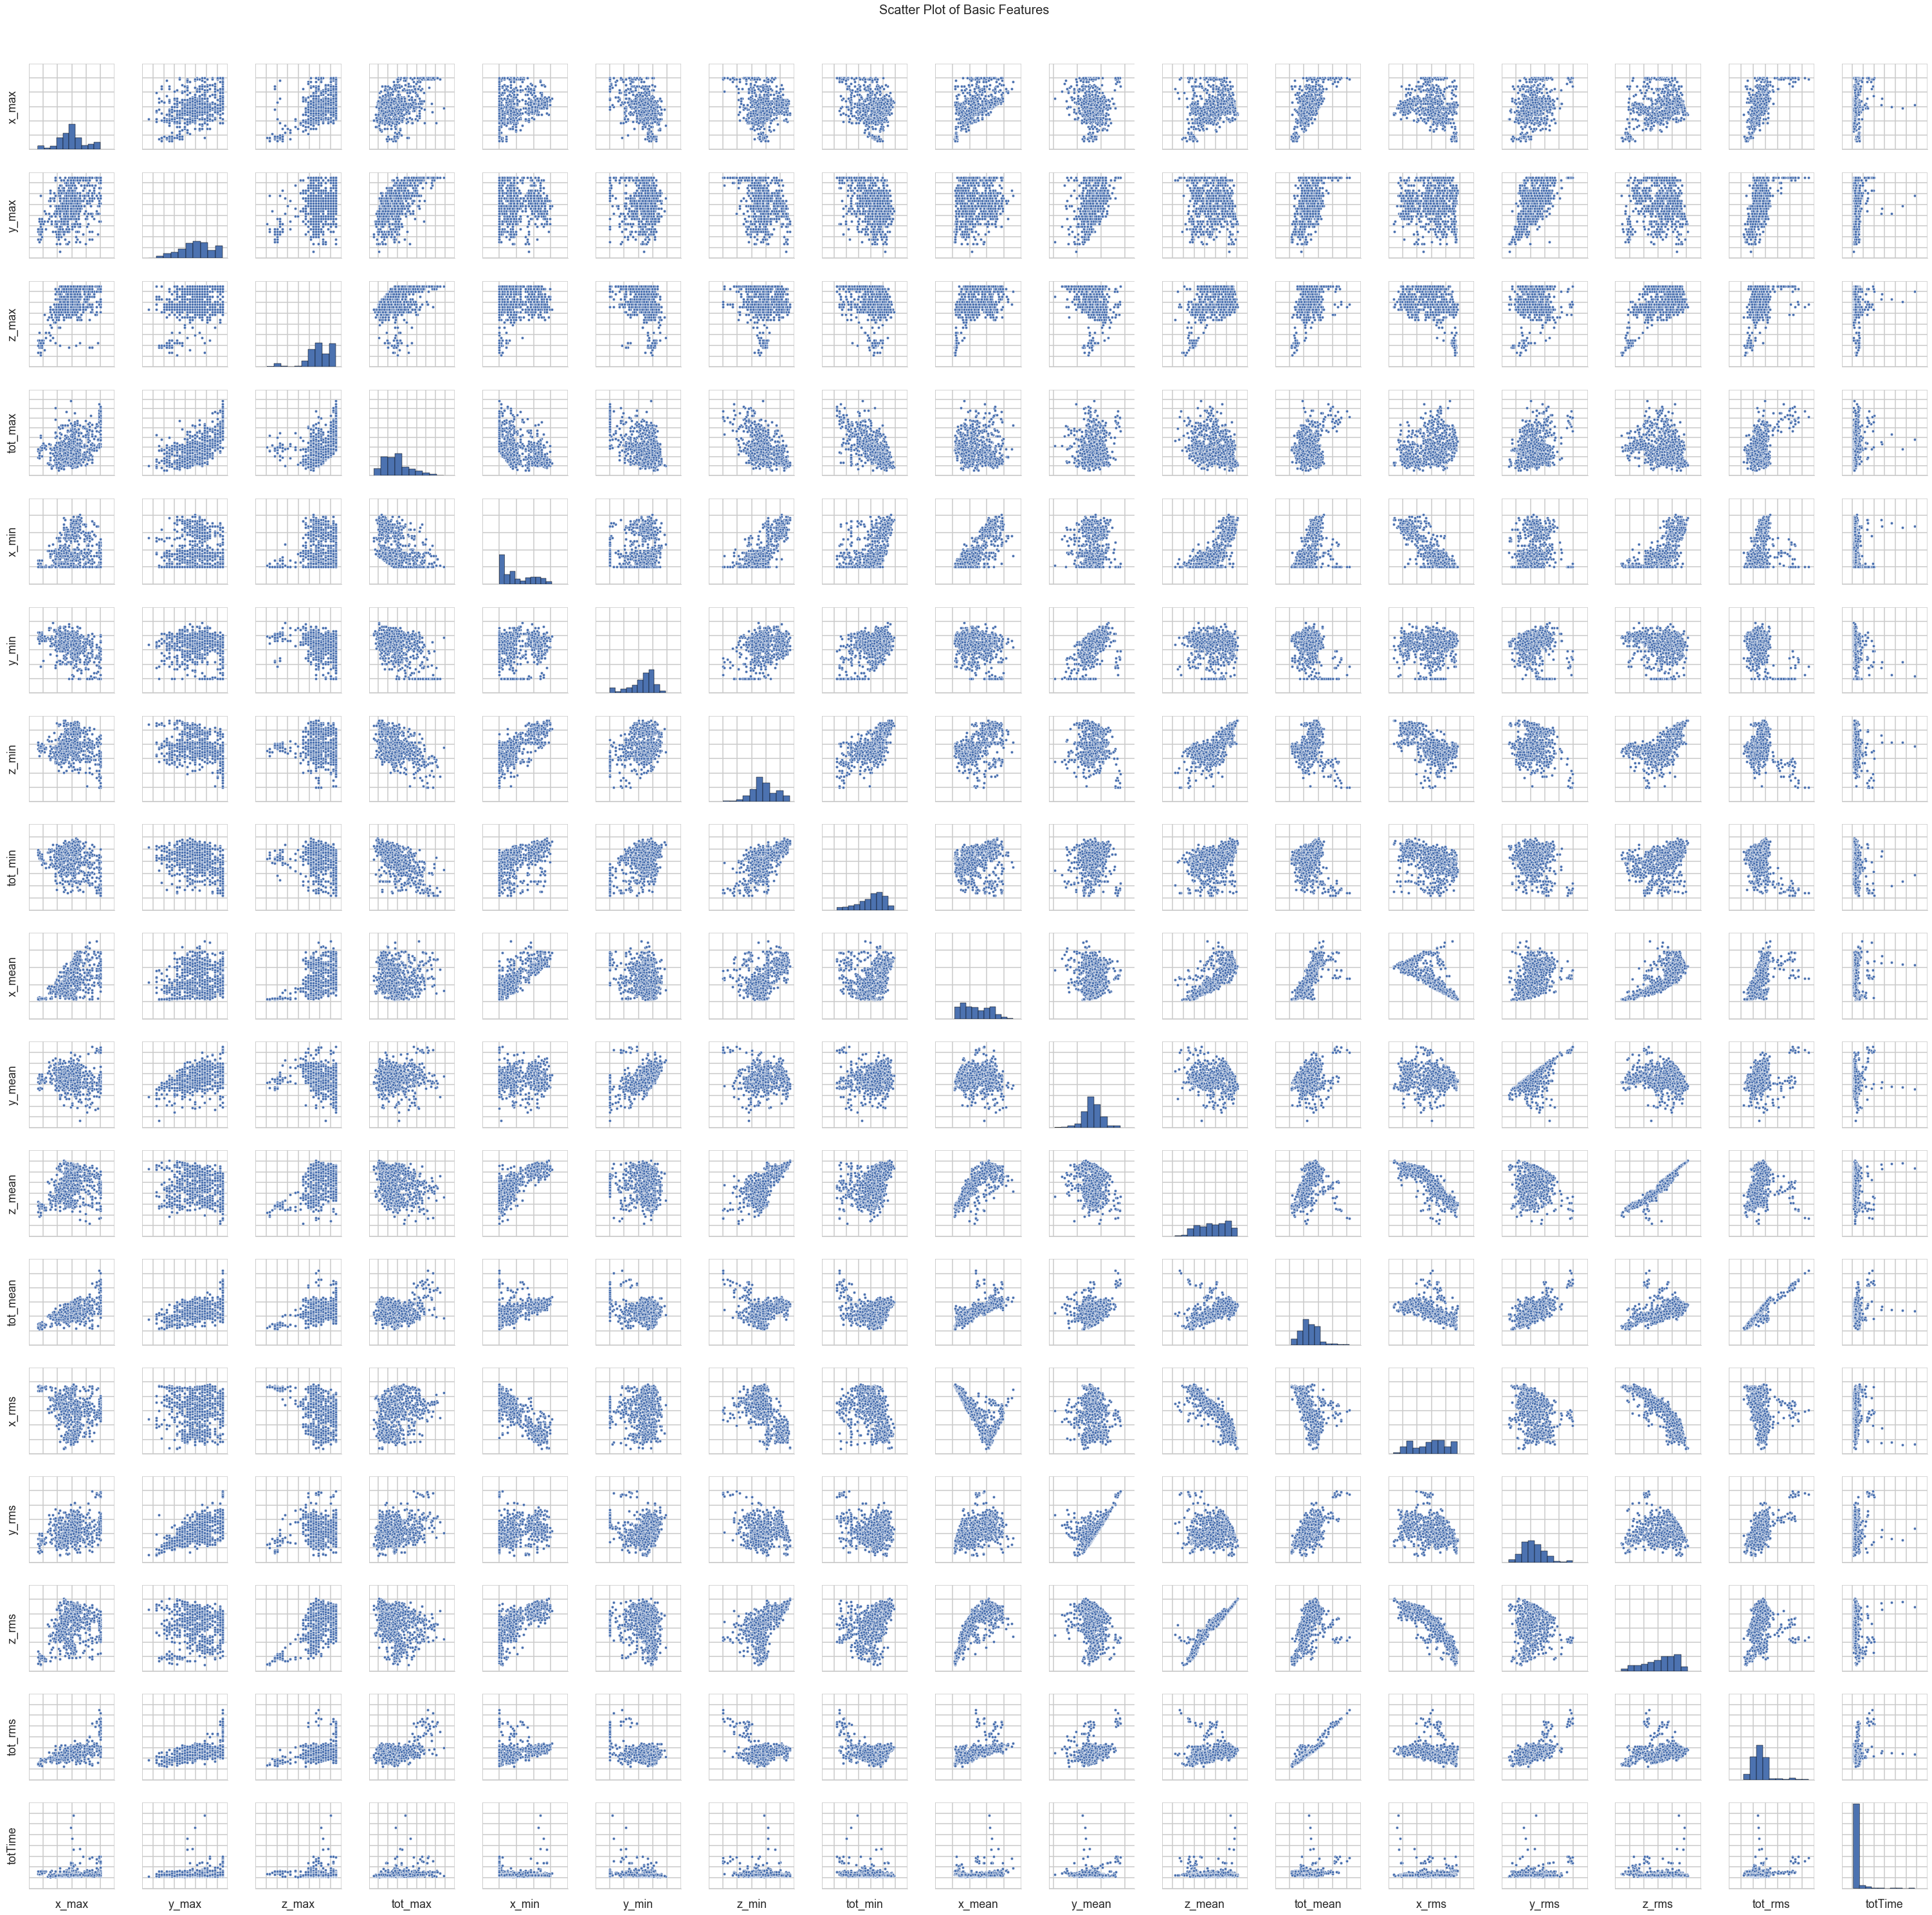

In [79]:
# Plot a seaborn pairplot for relationship between features.  Save in Plots/Pair/ folder
sns.set()
sns.set(style="whitegrid")
sns.set_context("poster")
g = sns.pairplot(featuresDF)
g.fig.suptitle('Scatter Plot of Basic Features', verticalalignment='top', fontsize=20)
plt.subplots_adjust(top=0.95)
g.set(xticklabels=[])
g.set(yticklabels=[])
plt.savefig("../Plots/Pair/"+"FeaturePairPlot.png",dpi=200)

In [ ]:
# For each feature, print a histogram for each activity for True/False (is/is not) that activity to see how 
# much the data overlaps and whether there are any good features that show good seperation between the two sets
# save in Plots/Histo/ folder
df = featuresDF

plt.ioff()
sns.set()
sns.set(style="white")
sns.set_context("talk")
for feature in col_names:
    for activity in df['activity'].unique():
        fig,ax = plt.subplots()
        fmax = int(df[feature][df['activity']==activity].max())+1
        fmin = int(df[feature][df['activity']==activity].min())-1
        binsize = np.arange(fmin,fmax,((fmax-fmin)/50.0))
        sns.distplot(df[feature][df['activity']==activity],ax=ax,kde=False,label=('is '+ str(activity)),bins=binsize,\
                     color='b',norm_hist=True)
        sns.distplot(df[feature][df['activity']!=activity],ax=ax,kde=False,label=('is not '+ str(activity)),\
                     bins=binsize,color='r',norm_hist=True)
        plt.title("Histogram of " + str(feature))
        plt.legend(frameon=True)
        plt.savefig("../Plots/Histo/"+ str(activity)+"-"+str(feature)+".png",dpi=200)
        plt.close()        
plt.ion()

In [ ]:
featuresDF.count()